In [10]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/Document Image Analysis/Assignment_2')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## (a) Convert a RGB image in a gray-scale image. Use your own implementation.

In [11]:
import numpy as np

def rgb_to_grayscale(image):
    if image.dtype != np.float32:
        image = image.astype(np.float32)
    grayscale = 0.2989 * image[:, :, 0] + 0.5870 * image[:, :, 1] + 0.1140 * image[:, :, 2]
    return np.round(grayscale).astype(np.uint8) # since this is jpg

In [12]:
from PIL import Image
import numpy as np

image_path = '2_1000x1500.jpg'
image = Image.open(image_path)
image_np = np.array(image)
grayscale_image_np = rgb_to_grayscale(image_np)
grayscale_image = Image.fromarray(grayscale_image_np)
grayscale_image_path = '2_1000x1500_gray.jpg'
grayscale_image.save(grayscale_image_path)

print(f'Grayscale image saved to {grayscale_image_path}')

Grayscale image saved to 2_1000x1500_gray.jpg


## (b) Conceive an algorithm to perform a histogram on a gray level image. Apply it on the image in grayscale.

In [14]:
import matplotlib.pyplot as plt

def calculate_histogram(image):
    histogram = np.zeros(256, dtype=int)
    for pixel in image.ravel():
        histogram[pixel] += 1

    return histogram

def plot_and_save_histogram(histogram, output_path):
    plt.figure()
    plt.title("Grayscale Histogram")
    plt.xlabel("Intensity Value")
    plt.ylabel("Pixel Count")
    plt.bar(range(256), histogram, color='gray')
    plt.xlim([0, 255])
    plt.savefig(output_path)
    plt.show()

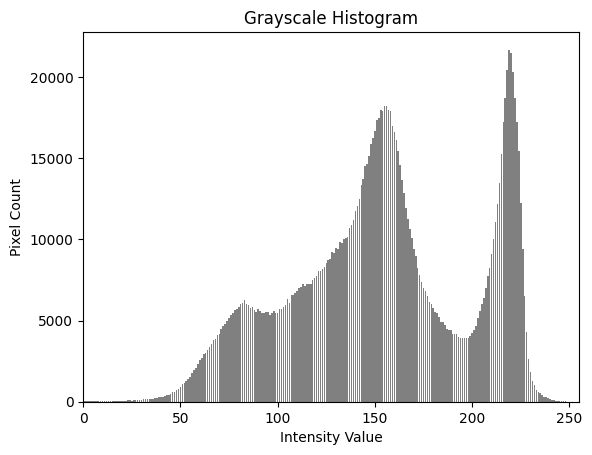

In [15]:
image_path = '2_1000x1500_gray.jpg'
image = Image.open(image_path)
image_np = np.array(image)
histogram = calculate_histogram(image_np)
histogram_image_path = '2_1000x1500_gray_his.jpg'
plot_and_save_histogram(histogram, histogram_image_path)

## (c) Apply your algorithm on each channel of the RGB image.

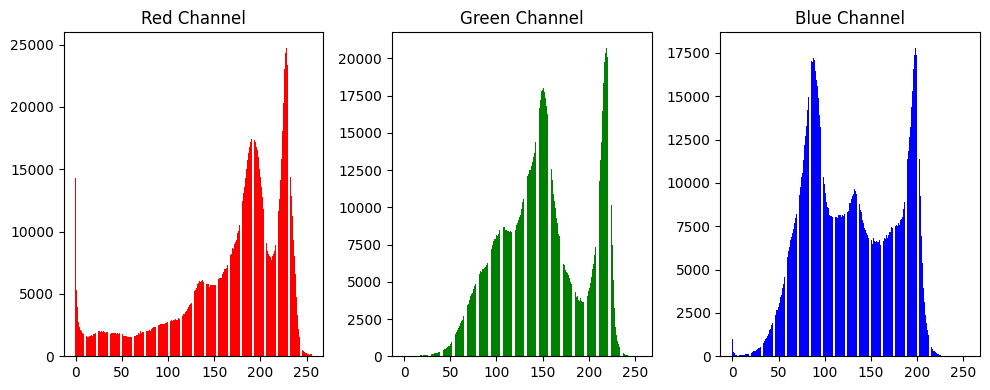

In [19]:
image_path = '2_1000x1500.jpg'
image = Image.open(image_path)
image_np = np.array(image)

R, G, B = image_np[:,:,0], image_np[:,:,1], image_np[:,:,2]
histogram_R = calculate_histogram(R)
histogram_G = calculate_histogram(G)
histogram_B = calculate_histogram(B)

plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.bar(range(256), histogram_R, color='red')
plt.title('Red Channel')

plt.subplot(1, 3, 2)
plt.bar(range(256), histogram_G, color='green')
plt.title('Green Channel')

plt.subplot(1, 3, 3)
plt.bar(range(256), histogram_B, color='blue')
plt.title('Blue Channel')
plt.tight_layout()

histogram_image_path = '2_1000x1500_rgb_his.png'
plt.savefig(histogram_image_path)

## (d) Represent the histogram of a color image. More information in lesson 2, slide 12. An example is shown in the figure below.

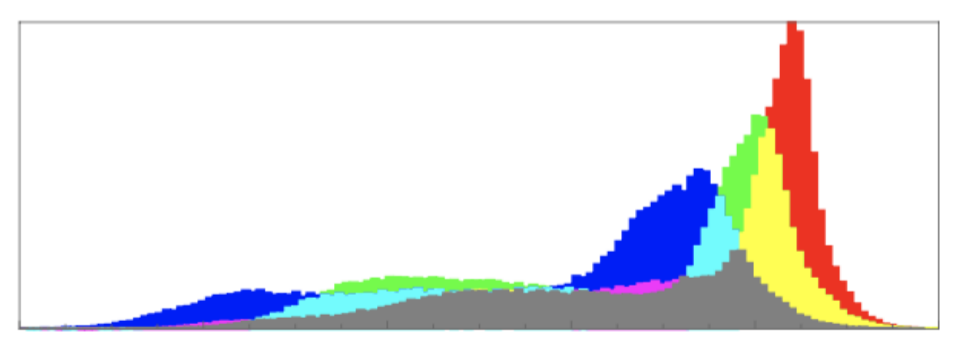

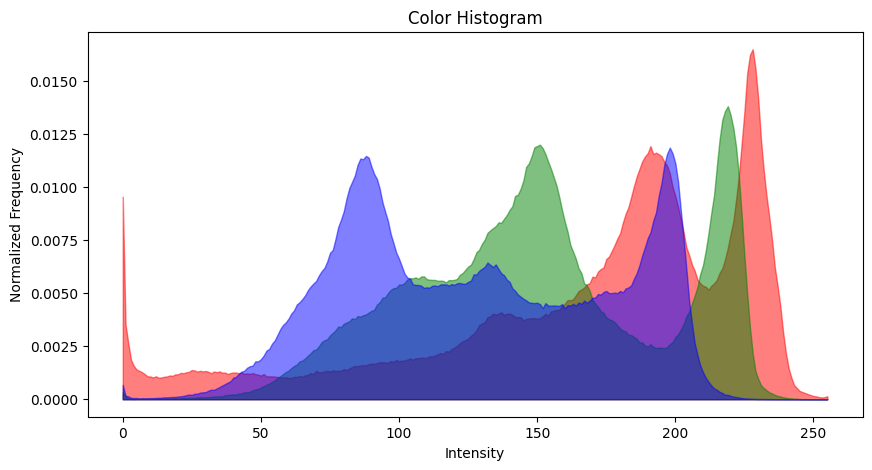

In [22]:
image_path = '2_1000x1500.jpg'
image = Image.open(image_path)
image_np = np.array(image)

R, G, B = image_np[:,:,0], image_np[:,:,1], image_np[:,:,2]

# set transparent of each color, let it be visible.
def plot_general_histogram(channel, color, alpha=0.5):
    hist, bins = np.histogram(channel.flatten(), bins=256, range=[0,256])
    # normalize or not
    hist = hist.astype('float') / hist.sum()
    plt.fill_between(bins[:-1], hist, color=color, alpha=alpha)


plt.figure(figsize=(10, 5))
plot_general_histogram(R, 'red')
plot_general_histogram(G, 'green')
plot_general_histogram(B, 'blue')

plt.title('Color Histogram')
plt.xlabel('Intensity')
plt.ylabel('Normalized Frequency')
histogram_image_path = '2_1000x1500_all.jpg'
plt.savefig(histogram_image_path)
plt.show()
